# Flights Data Exploratory Analysis - King Khalid International Airport

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('flights_RUH.csv')
df

,flight_number,aircraft.model,aircraft.reg,aircraft.modeS,airline.name,airline.iata,airline.icao,status,flight_type,codeshareStatus,isCargo,callSign,origin_airport_name,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
0,PF 769,Airbus A320,NaN,NaN,Air Sial,PF,NaN,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,2.0,['Basic'],OPIS,ISB,Islamabad,Asia/Karachi,2025-03-14 21:01Z,2025-03-15 00:01+03:00
1,XY 333,Airbus A320 NEO,HZ-NS35,710DB9,flynas,XY,KNE,Unknown,departure,IsOperator,False,KNE333,Riyadh,OERK,RUH,1.0,['Basic'],VILK,LKO,Lucknow,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
2,QP 568,Boeing 737,NaN,NaN,Starlight Airline,QP,SLT,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,3.0,['Basic'],VABB,BOM,Mumbai,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
3,F3 161,Airbus A320,NaN,NaN,flyadeal,F3,FAD,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,5.0,['Basic'],OEJN,JED,Jeddah,Asia/Riyadh,2025-03-14 21:10Z,2025-03-15 00:10+03:00
4,KL 423,Airbus A330-300,NaN,NaN,KLM,KL,KLM,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,1.0,['Basic'],OEDF,DMM,Ad Dammam,Asia/Riyadh,2025-03-14 21:15Z,2025-03-15 00:15+03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153303,XY 132,NaN,NaN,NaN,flynas,XY,KNE,Unknown,arrival,Unknown,False,NaN,Riyadh,OERK,RUH,5.0,['Basic'],OEHL,HAS,Khail,Asia/Riyadh,2025-10-10 08:20Z,2025-10-10 11:20+03:00
153304,SV 1458,NaN,NaN,NaN,Saudi Arabian,SV,SVA,Expected,arrival,Unknown,False,NaN,Riyadh,OERK,RUH,5.0,['Basic'],OEMA,MED,Medina,Asia/Riyadh,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153305,KU 773,NaN,NaN,NaN,Kuwait,KU,KAC,Unknown,arrival,Unknown,False,NaN,Riyadh,OERK,RUH,3.0,['Basic'],OKBK,KWI,Kuwait City,Asia/Kuwait,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153306,SV 563,NaN,NaN,NaN,Saudi Arabian,SV,SVA,Unknown,arrival,IsOperator,False,SVA563,Riyadh,OERK,RUH,4.0,['Basic'],OMDB,DXB,Dubai,Asia/Dubai,2025-10-10 08:40Z,2025-10-10 11:40+03:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153308 entries, 0 to 153307
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   flight_number                 153308 non-null  object 
 1   aircraft.model                153122 non-null  object 
 2   aircraft.reg                  36234 non-null   object 
 3   aircraft.modeS                45331 non-null   object 
 4   airline.name                  153308 non-null  object 
 5   airline.iata                  153294 non-null  object 
 6   airline.icao                  152745 non-null  object 
 7   status                        153308 non-null  object 
 8   flight_type                   153308 non-null  object 
 9   codeshareStatus               153308 non-null  object 
 10  isCargo                       153308 non-null  bool   
 11  callSign                      45137 non-null   object 
 12  origin_airport_name           153308 non-nul

In [6]:
df.columns = df.columns.str.replace('.','_')

In [7]:
df["movement_scheduledTime_local"] = pd.to_datetime(df["movement_scheduledTime_local"])
df["movement_scheduledTime_utc"] = pd.to_datetime(df["movement_scheduledTime_utc"])

In [8]:
columns_to_check = df[["flight_number", "airline_name", "movement_scheduledTime_local", "status", "origin_airport_name", "destination_airport_name","aircraft_model"]]
dup = df[columns_to_check.duplicated(keep=False)]
df.drop_duplicates(subset=columns_to_check , keep='first' , inplace=True)

# Busiest Destination

In [9]:
Busiest_Destination = df['destination_airport_name'].value_counts().head(10)
pd.DataFrame({'Airport': Busiest_Destination.index,'Number of Flights':Busiest_Destination.values})

,Airport,Number of Flights
0,Jeddah,27833
1,Dubai,12319
2,Cairo,9975
3,Abha,9003
4,Ad Dammam,7378
5,Medina,6563
6,Jazan,5181
7,Tabuk,4293
8,Istanbul,4083
9,Amman,3323


<BarContainer object of 10 artists>

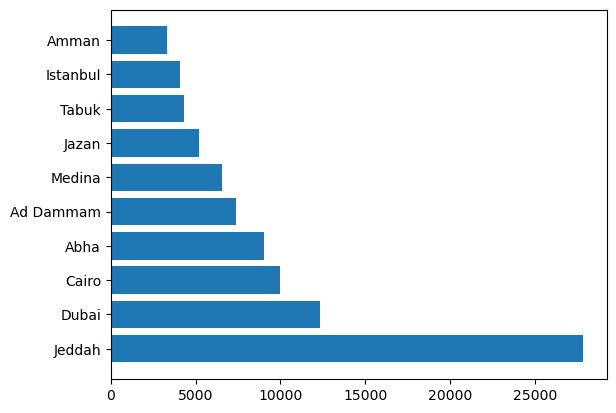

In [10]:
plt.barh(Busiest_Destination.index,Busiest_Destination.values)

# Average Daily Flights per Airline

In [11]:
daily = df['movement_scheduledTime_local'].dt.date
dg = df.groupby([daily,'airline_name']).size()
avg_daily = dg.groupby('airline_name').mean().sort_values(ascending=False).head(10)
pd.DataFrame({'Airline':avg_daily.index,'Avg Daily Flights':avg_daily.values})

,Airline,Avg Daily Flights
0,Saudi Arabian,289.466667
1,flynas,161.504762
2,flyadeal,117.861905
3,Gulf Air,10.414286
4,flydubai,9.804762
5,EgyptAir,8.847619
6,Qatar,8.580952
7,Etihad,7.328571
8,Emirates,6.500000
9,Turkish,6.000000


# Busiest Days

In [12]:
busiest_day = df['movement_scheduledTime_local'].dt.date.value_counts().head(10)
pd.DataFrame({"date":busiest_day.index,'Number of flights':busiest_day.values})

,date,Number of flights
0,2025-08-11,805
1,2025-08-18,803
2,2025-07-21,799
3,2025-08-25,798
4,2025-08-23,797
5,2025-08-04,796
6,2025-08-13,796
7,2025-08-22,794
8,2025-07-23,794
9,2025-07-28,793


# Popular Destinations in July

In [13]:
month = df[df['movement_scheduledTime_local'].dt.month == 7]
july = month['destination_airport_name'].value_counts().head(15)
pd.DataFrame({'City': july.index, 'number of flight': july.values})

,City,number of flight
0,Jeddah,4052
1,Dubai,1787
2,Cairo,1513
3,Abha,1468
4,Ad Dammam,1064
5,Medina,948
6,Jazan,777
7,Istanbul,660
8,Tabuk,641
9,Taif,508


# Top Airlines Based on Total Flights

In [14]:
top = df['airline_name'].value_counts().head(10)
pd.DataFrame({"Airline_name": top.index, 'Total Flights': top.values})

,Airline_name,Total Flights
0,Saudi Arabian,60788
1,flynas,33916
2,flyadeal,24751
3,Gulf Air,2187
4,flydubai,2059
5,EgyptAir,1858
6,Qatar,1802
7,Etihad,1539
8,Emirates,1365
9,Turkish,1260


<BarContainer object of 10 artists>

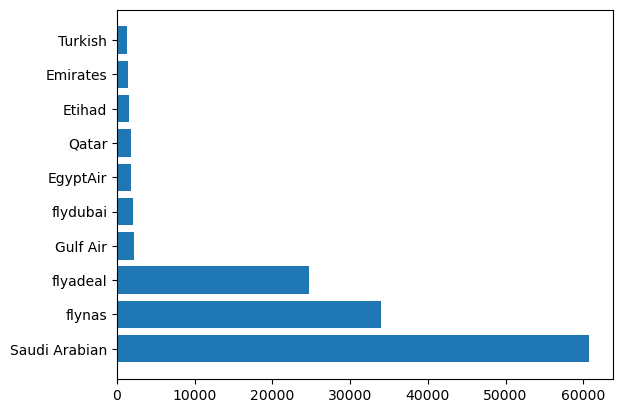

In [15]:
plt.barh(top.index,top.values)

# Total Canceled Flight

In [16]:
can = (df['status'] == 'Canceled').sum()
pd.DataFrame({'Total Canceled Flight': [can]})

,Total Canceled Flight
0,78


# Airlines by Number of Destinations Served

In [17]:
rak = df.groupby('airline_name')["destination_airport_name"].nunique().sort_values(ascending=False).head(15)
pd.DataFrame({"airline_name": rak.index , "count of destination": rak.values})

,airline_name,count of destination
0,Saudi Arabian,77
1,flynas,60
2,flyadeal,27
3,Air India Express,7
4,Pakistan International,5
5,Unknown/Private owner,5
6,IndiGo,4
7,EgyptAir,4
8,Air India,3
9,VistaJet,3


# Destination Served by Saudi Arabian Airlines

In [18]:
desti = df[df["airline_name"] == 'Saudi Arabian']['destination_airport_name'].unique()
pd.DataFrame({'destination': desti})

,destination
0,Mumbai
1,Neyran
2,Jeddah
3,Guangzhou
4,Ad Dammam
...,...
72,Milan
73,Deli
74,Kuala Lumpur
75,Jakarta


# Most Used Aircraft Models

In [19]:
top_aircraft = df['aircraft_model'].value_counts().sort_values(ascending=False).head(10)
pd.DataFrame({
    'Aircraft_model': top_aircraft.index,
    'Total_flights': top_aircraft.values})

,Aircraft_model,Total_flights
0,Airbus A320,59228
1,Airbus A320 NEO,35433
2,Airbus A321,20167
3,Airbus A330,8105
4,Boeing 777,4685
5,Airbus A330-300,3654
6,Boeing 737-800,2820
7,Airbus A321 NEO,2465
8,Boeing 777-300,2188
9,Boeing 737,1933


# Daily Flight Trends

In [20]:
trend = df.groupby(df['movement_scheduledTime_utc'].dt.date).size()
trends = trend.iloc[1:-1]
trends

movement_scheduledTime_utc
2025-03-15    600
2025-03-16    566
2025-03-17    597
2025-03-18    430
2025-03-19    599
             ... 
2025-10-05    737
2025-10-06    749
2025-10-07    757
2025-10-08    712
2025-10-09    767
Length: 209, dtype: int64

# Daily Flight Plot

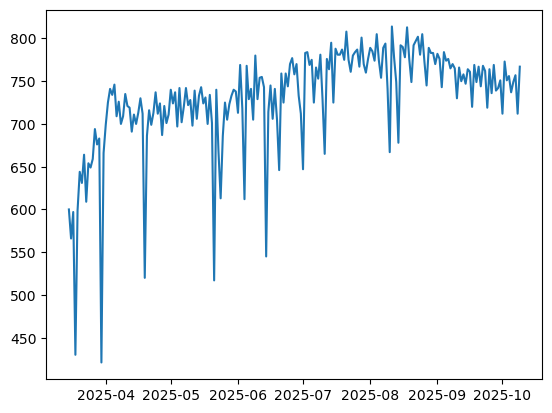

In [21]:
plt.plot(trends.index,trends.values)